# Netflix Movie Data Analysis Project

## Name : Chowdhary Vraj Pareshkumar

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Reading all the data from csv file
# Using lineterminator for row separated data
df = pd.read_csv('movies_dataset.csv', lineterminator = '\n') 

In [24]:
# Displaying initial five records using head
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
# 
df.info()
'''
Here we can observe the datatype for Release_Date is object(string) need to change
it to Datetime
Moreover from the statistics we can see that dataset does not have missing values
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [25]:
# Getting specific column from the created dataframe
df['Genre'].head()
# Note : Removal of whitespaces might be needed for data preprocessing

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [26]:
# Checking for duplicate/redundant values
df.duplicated().sum()
#df.duplicated()
# As the duplicated sum is zero, we can conclude that there are no duplicate records

0

In [27]:
# Performing basic statistics (Only performed on numerical columns)
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


## Exploration Summary:

#### We have a dataframe consisting of total 9827 rows and 9 columns(attributes).
#### Dataset does not have any NaNs or duplicate values.
#### The datatype for Release_Date is object(string) need to convert it to Datetime.
#### Removal of whitespaces and commas from Genre column.
#### Keeping only the required columns for analysis and removing the columns Overview, Orginal_Language and Poster_Url.
#### Categorize Vote_Average for proper analysis.


In [28]:
# Need to only keep year from the given date
# Converting Release_Date column from string to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

# Checking the datatype for Release_Date
print("Changed datatype for Release_Date : ",df['Release_Date'].dtypes)

Changed datatype for Release_Date :  datetime64[ns]


In [29]:
# Only extracting year from date
df['Release_Date'] = df['Release_Date'].dt.year

# Checking Datatype for Release_Date (int32 because it only has year as numerical value)
print("Changed datatype for Release_Date : ",df['Release_Date'].dtypes)

Changed datatype for Release_Date :  int32


In [30]:
# Release_Date Converted to columns with Years
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [31]:
# Dropping the columns which are not necessary for required analysis

# Creating the list of the columns that need to be removed
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [32]:
# Using drop function to remove the columns in list cols
# axis = 1 for columns
# inplace = True for permanent deletion
df.drop(cols, axis = 1, inplace = True)

print("Columns after removal of unnecessary columns :\n")
df.columns

Columns after removal of unnecessary columns :



Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [33]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [40]:
# Categorizing movies based on vote_average
# Instead of numerical values we will assign labels (Popular, Average, Below Average, Not Popular)

# Creating user defined function to create category
def categorize_col(df, col, labels):
  
    '''
    Categories based on (max, 75%, 50%, 25%, min)
    min-25% : not_popular
    25%-50% : below_average
    50%-75% : average
    75%-max : popular
    '''
    # Converting numerical data to labels
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    # Specifying column for categorization
    # Used cut function for assisting categorization
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [41]:
# Creating labels
labels = ['not_popular', 'below_average', 'average', 'popular']

# Call the categorize_col() function
categorize_col(df, 'Vote_Average', labels)

print("Verifying the unique values after assigning labels\n")
df['Vote_Average'].unique()

Verifying the unique values after assigning labels



['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [42]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [43]:
# Finding the count of movies based on labels category
df['Vote_Average'].value_counts()

Vote_Average
not_popular      2467
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

In [44]:
# Dropping all the duplicate values permanently
df.dropna(inplace = True)

# Verifying the result
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [45]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


#### Split genres into list then explode the dataframe to convert it to 1NF

In [46]:
# Need to filter Genre Column which is multi-valued attribute to convert it to 1NF
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [48]:
# Casting column into category

# Using astype
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [49]:
# No. of records increased as we broke the multi-valued attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [50]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

## Data Visualization

In [51]:
sns.set_style('whitegrid')

### What is the most frequent genre of movies released on Netflix?

In [52]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

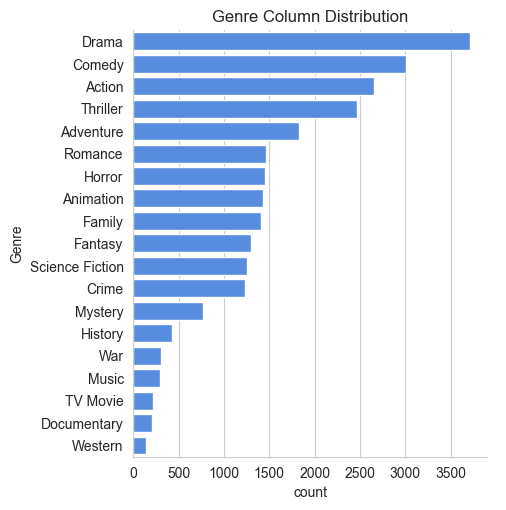

In [57]:
# Using seaborn library for plotting
# catplot : category plot
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title("Genre Column Distribution")
plt.show()

### Which has highest votes in Vote_Average column ?

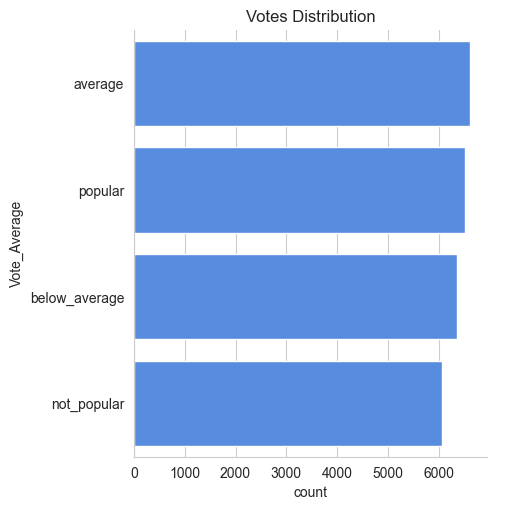

In [58]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5' )

plt.title('Votes Distribution')

plt.show()

### What movie got the highest popularity ? What is its genre?

In [59]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### What movie got the lowest popularity ? What is its genre?

In [60]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


### Which year has the most filmed movies ?

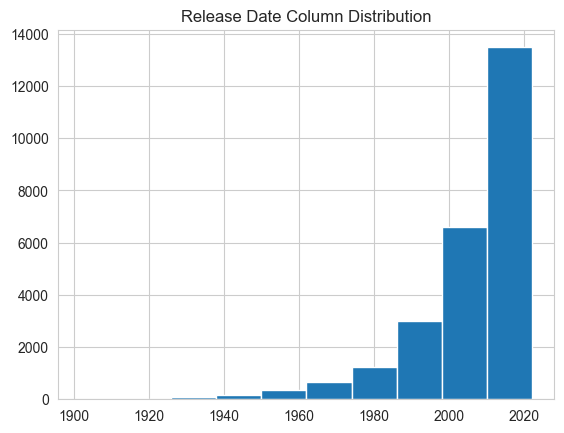

In [64]:
df['Release_Date'].hist()
plt.title("Release Date Column Distribution")
plt.show()

# Summary

* Drama genre is the most frequent genre in our movie dataset and has occurred more than 14% of the times among 19 other genres.
* We have 25.5% of our dataset with popular vote (6520 rows). Consequently, Drama again gets the highest popularity among fans by having more than 18.5% of movies popularities.
* Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Science Fiction.
* The United States vs. Billie Holiday and Threads movie has the lowest popularity. Subsequently, having genres Music, Drama, War, Sci-Fi and History.
* The highest number of movies were filmed in the year 2020.